## Visualize Silhouette Score Results

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(patchwork))
source("themes.r")

In [2]:
figure_dir <- "figures"
sup_figure_dir <- file.path(figure_dir, "supplementary")

output_supplementary_silhouette_figure <- file.path(
    sup_figure_dir, "supplementary_silhouette_scores.png"
)

In [3]:
silhouette_dir <- file.path("../3.evaluate_model/evaluations/")
silhouette_file <- file.path(silhouette_dir, "silhouette_score_results.tsv")

In [4]:
# Load data
silhouette_summary_df <- readr::read_tsv(
    silhouette_file,
    col_types = readr::cols(
        .default = "c",
        silhouette_score = "d"
    )
)

# Order feature spaces for plotting
silhouette_summary_df$feature_space <-
    factor(
        silhouette_summary_df$feature_space,
        levels = rev(c("CP", "DP", "CP_and_DP"))
    )

# Alphabetical order for plotting
silhouette_summary_df$phenotype <-
    factor(
        silhouette_summary_df$phenotype,
        levels = unique(silhouette_summary_df$phenotype)[rev(order(unique(silhouette_summary_df$phenotype)))]
    )

print(dim(silhouette_summary_df))
silhouette_summary_df

[1] 45  3


feature_space,phenotype,silhouette_score
<fct>,<fct>,<dbl>
CP,Large,0.0721205554
CP,Prometaphase,-0.0586695235
CP,Grape,0.1346126042
CP,Interphase,-0.0823585065
CP,Apoptosis,0.1895095165
CP,ADCCM,-0.0480274527
CP,SmallIrregular,-0.0729012382
CP,Polylobed,0.0119194490
CP,Metaphase,0.1611621055


In [5]:
# Summarize the top feature spaces
top_feature_spaces <- silhouette_summary_df %>%
    dplyr::group_by(phenotype) %>%
    dplyr::arrange(silhouette_score) %>%
    dplyr::top_n(1, silhouette_score) %>%
    dplyr::ungroup() %>%
    dplyr::count(feature_space) %>%
    dplyr::rename(number_of_phenotypes_with_top_silhouette_score = n) %>%
    dplyr::mutate(
        proportion_of_top_phenotypes = (
            number_of_phenotypes_with_top_silhouette_score /
            length(unique(silhouette_summary_df$phenotype))
        )
    )

top_feature_spaces

feature_space,number_of_phenotypes_with_top_silhouette_score,proportion_of_top_phenotypes
<fct>,<int>,<dbl>
CP_and_DP,1,0.06666667
DP,7,0.46666667
CP,7,0.46666667


In [6]:
top_feature_spaces_positive_silhouette <- silhouette_summary_df %>%
    dplyr::filter(silhouette_score > 0) %>%
    dplyr::group_by(phenotype) %>%
    dplyr::arrange(silhouette_score) %>%
    dplyr::top_n(1, silhouette_score) %>%
    dplyr::ungroup() %>%
    dplyr::count(feature_space) %>%
    dplyr::rename(number_of_phenotypes_with_top_silhouette_score = n) %>%
    dplyr::mutate(
        proportion_of_top_phenotypes = (
            number_of_phenotypes_with_top_silhouette_score /
            sum(number_of_phenotypes_with_top_silhouette_score)
        )
    )

top_feature_spaces_positive_silhouette

feature_space,number_of_phenotypes_with_top_silhouette_score,proportion_of_top_phenotypes
<fct>,<int>,<dbl>
CP_and_DP,1,0.09090909
DP,4,0.36363636
CP,6,0.54545455


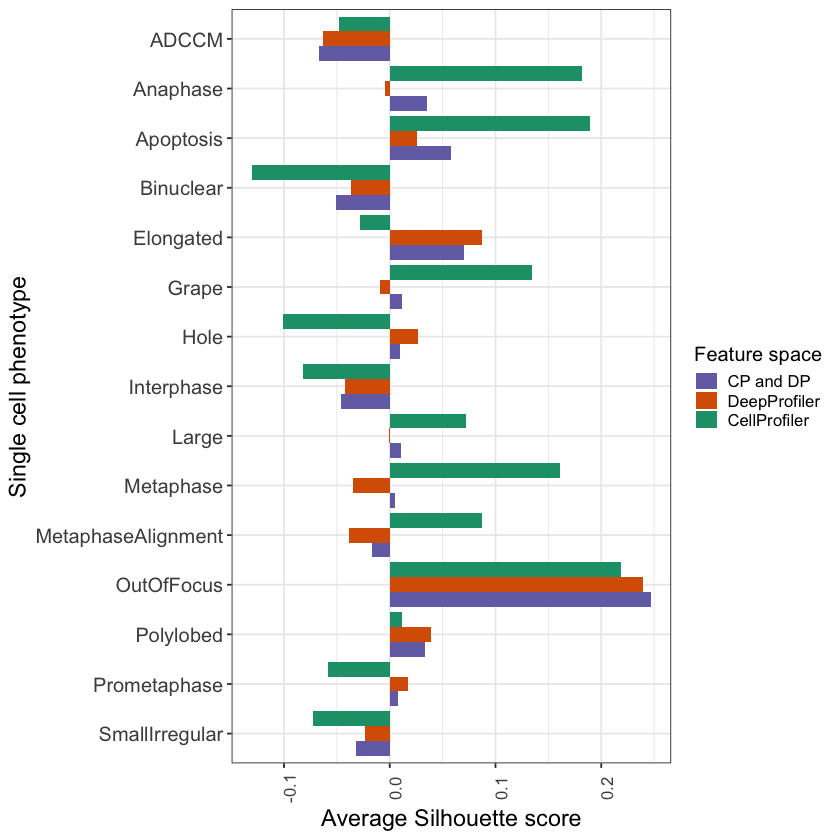

In [7]:
silhouette_score_gg <- (
    ggplot(
        silhouette_summary_df,
        aes(x = phenotype, y = silhouette_score)
    )
    + geom_bar(
        aes(fill = feature_space),
        stat = "identity",
        position = "dodge"
    )
    + theme_bw()
    + scale_fill_manual(
        name = "Feature space",
        labels = feature_space_labels,
        values = feature_space_colors
    )
    + labs(
        y = "Average Silhouette score",
        x = "Single cell phenotype"
    )
    + phenotypic_ggplot_theme
    # Decrease spacing in legend and rotate text
    + theme(
        legend.spacing.y = unit(0.2, "cm"),
        legend.box.spacing = unit(0.3, "cm"),
        legend.key.size = unit(0.8, "lines"),
        legend.key.width = unit(1, "lines"),
        axis.text.x = element_text(angle = 90),
        axis.text.y = element_text(size = 12),
        axis.title = element_text(size = 14)
    )
    + coord_flip()
)

ggsave(output_supplementary_silhouette_figure, dpi = 500, height = 5.5, width = 5)

silhouette_score_gg